#### Import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#### Load and preprocess mnist dataset

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test /255.0

#### Display some data from dataset

(9, 28, 28)


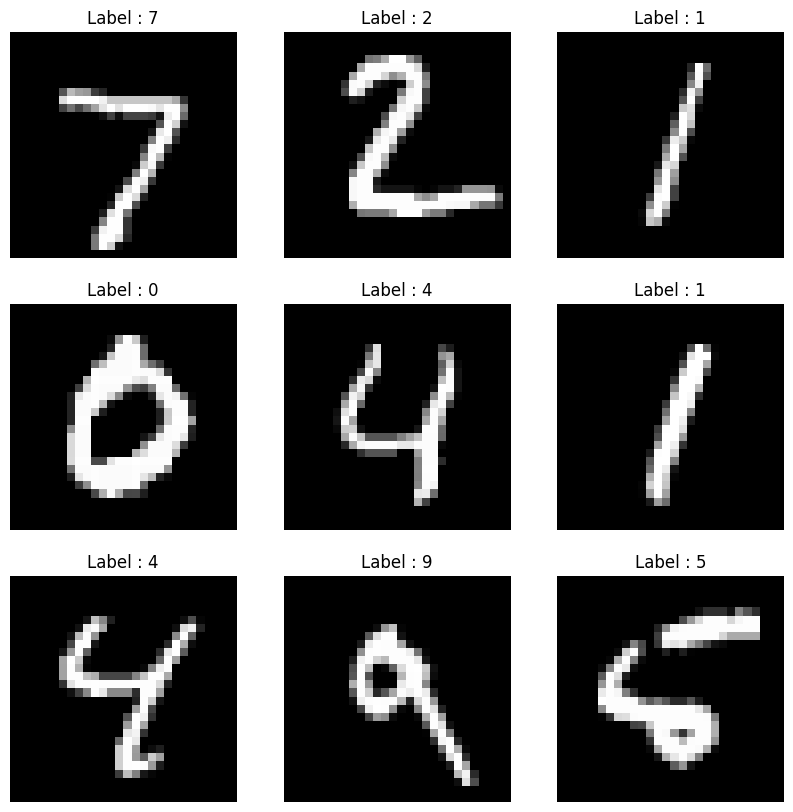

In [4]:
images = x_test[:9]
labels = y_test[:9]
print(images.shape)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i + 1)
    plt.imshow(images[i],cmap='gray')
    plt.title(f"Label : {labels[i]}")
    plt.axis('off')
plt.show()


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)




#### Build CNN model

In [8]:
inputs = Input(shape = (28,28,1))
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same')(inputs)
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs,name = "Classification_Model")
model.summary()


Model: "Classification_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                             

#### Define model

In [54]:
inputs = Input(shape=(28,28))
x = Flatten()(inputs)
x = Dense(64,activation = "relu")(x)
x = Dense(128,activation = "relu")(x)
x = Dense(64,activation = "relu")(x)
outputs = Dense(10, activation = "softmax")(x)
model = Model(inputs,outputs, name = "Classification_Model")
model.summary()


Model: "Classification_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                50240     
                                                                 
 dense_51 (Dense)            (None, 128)               8320      
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 10)                650       
                                                                 
Total params: 67466 (263.54 KB)
Trainable para

#### Compile the model

In [9]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )


#### Train the model

In [10]:
history = model.fit(x_train,y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5


1461/1875 [======================>.......] - ETA: 1:23 - loss: 0.1143 - accuracy: 0.9655

#### Ploting


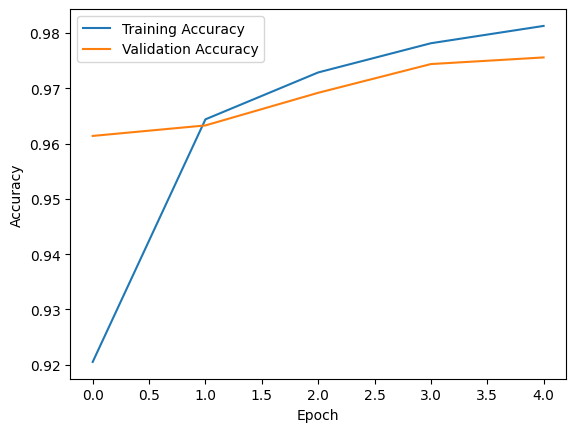

313/313 - 1s - loss: 0.0843 - accuracy: 0.9756 - 1s/epoch - 4ms/step
Test accuracy: 0.975600004196167


In [57]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_flatten, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')